<a href="https://colab.research.google.com/github/SmitaVidhate/Supervised-Machine-Learning/blob/main/fashion_MNIST_Classification-KNN-SVM-ADABOOST-Logistic_Regression-Votting_Classifier-Stakking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
%matplotlib inline

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full.dtype

dtype('uint8')

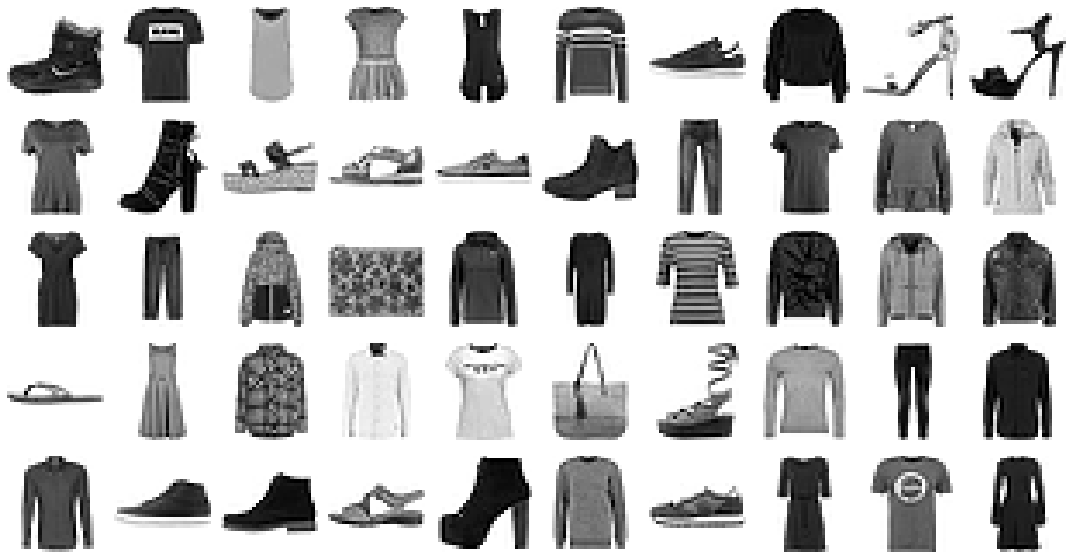

In [6]:
#Lets take a look at sample images
plt.figure(figsize=(15,8))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(X_train_full[i].reshape((28,28)),cmap='binary')
    plt.axis("off")
plt.tight_layout()
plt.show()

In [7]:
X_train_full = X_train_full/255.0
X_test = X_test/255.0



In [8]:
nsamples, nx, ny = X_train_full.shape
X_train_full2 = X_train_full.reshape((nsamples,nx*ny))

In [9]:
nsamples, nx, ny = X_test.shape
X_test2 = X_test.reshape((nsamples,nx*ny))

In [46]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 42)

In [48]:
dtc.fit(X_train_full2,y_train_full)

DecisionTreeClassifier(random_state=42)

In [49]:

y_pred=dtc.predict(X_test2)
y_pred


array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
print(accuracy_score(y_pred,y_test)*100)

78.88


In [ ]:
print(precision_score(y_test, y_pred, average='macro')*100)

79.07944419130592


In [ ]:
print(recall_score(y_test, y_pred, average='macro')*100)

78.88000000000001


In [ ]:
print(f1_score(y_test, y_pred, average='macro')*100)

78.96654287555151


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC

In [55]:
estimator = []
estimator.append(('LR', LogisticRegression(solver ='saga', 
                                           multi_class ='multinomial', 
                                           max_iter = 200)))

#estimator.append(('SVC', SVC(kernel='linear', gamma =0.001, probability = True)))

estimator.append(('KNN', OneVsRestClassifier(KNeighborsClassifier())))

In [56]:
from sklearn.ensemble import VotingClassifier
vot_soft = VotingClassifier(estimators = estimator, voting ='soft', verbose=True)

In [59]:
vot_soft.fit(X_train_full2,y_train_full)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[Voting] ....................... (1 of 2) Processing LR, total= 9.2min
[Voting] ...................... (2 of 2) Processing KNN, total=   0.5s


VotingClassifier(estimators=[('LR',
                              LogisticRegression(max_iter=200,
                                                 multi_class='multinomial',
                                                 solver='saga')),
                             ('KNN',
                              OneVsRestClassifier(estimator=KNeighborsClassifier()))],
                 verbose=True, voting='soft')

In [60]:
y_pred_VC=vot_soft.predict(X_test2)
y_pred_VC

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
print(accuracy_score(y_pred_VC,y_test)*100)

87.16000000000001


In [ ]:
print(precision_score(y_pred_VC,y_test,average='macro')*100)

87.16


In [ ]:
print(recall_score(y_pred_VC,y_test,average='macro')*100)

87.17295026035025


In [ ]:
print(f1_score(y_pred_VC,y_test,average='macro')*100)

87.10972821558661


In [10]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import six
import sys
sys.modules['sklearn.externals.six'] = six
from mlxtend.classifier import StackingClassifier

In [11]:
knn = OneVsRestClassifier(KNeighborsClassifier())
NB = GaussianNB() 
model_KNC=knn.fit(X_train_full2, y_train_full)   
pred_knc = model_KNC.predict(X_test2)

In [12]:
print('Accuracy score of KNeighbors Classifier is:', (accuracy_score(y_test, pred_knc)) * 100)

Accuracy score of KNeighbors Classifier is: 85.16


In [13]:
model_NB = NB.fit(X_train_full2, y_train_full)
pred_nb = model_NB.predict(X_test2)

In [14]:
print('Accuracy of Naive Bayes Classifier:', (accuracy_score(y_test, pred_nb)) * 100)

Accuracy of Naive Bayes Classifier: 58.56


In [18]:
lr = LogisticRegression(solver ='saga', multi_class ='multinomial', max_iter = 200)  
clf_stack = StackingClassifier(classifiers =[knn, NB], meta_classifier = lr, use_probas = True, use_features_in_secondary = True)

In [16]:
model_stack = clf_stack.fit(X_train_full2, y_train_full)  

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [20]:
ypred_stack = model_stack.predict(X_test2) 

In [21]:
print('Accuracy score of Stacked model:', (accuracy_score(y_test, ypred_stack)) * 100)

Accuracy score of Stacked model: 87.1


In [22]:
print(f1_score(y_test, ypred_stack, average='macro')*100)

87.14764940988256


In [23]:
print(recall_score(y_test, ypred_stack, average='macro')*100)

87.1


In [24]:
print(precision_score(y_test, ypred_stack, average='macro')*100)

87.22967901185079


In [25]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [29]:
rf.fit(X_train_full2,y_train_full)

RandomForestClassifier()

In [31]:
y_pred_rf=rf.predict(X_test2)
y_pred_rf

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [32]:
print(accuracy_score(y_pred_rf,y_test)*100)

87.53


In [33]:
print(precision_score(y_pred_rf,y_test,average='macro')*100)

87.52999999999999


In [34]:
print(recall_score(y_pred_rf,y_test,average='macro')*100)

87.39805631817525


In [35]:
print(f1_score(y_pred_rf,y_test,average='macro')*100)

87.3856580890663


In [36]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=50,learning_rate=1,random_state = 0)

In [38]:
ada.fit(X_train_full2,y_train_full)

AdaBoostClassifier(learning_rate=1, random_state=0)

In [39]:
y_pred_ada=ada.predict(X_test2)
y_pred_ada

array([7, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [40]:
print(accuracy_score(y_pred_ada,y_test)*100)

54.25


In [41]:
print(precision_score(y_pred_ada,y_test,average='macro')*100)

54.25


In [42]:
print(recall_score(y_pred_ada,y_test,average='macro')*100)

56.12784019025104


In [43]:
print(f1_score(y_pred_ada,y_test,average='macro')*100)

51.82906120607471


Predicted:  [3]
Actual:  3


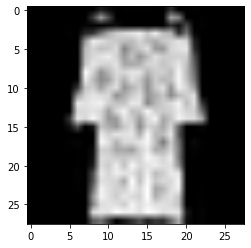

In [51]:
pre = X_test[33].reshape(1, -1)
y_pred_1 = dtc.predict(pre)
p = plt.subplot(1,1,1)
p.imshow(X_test[33], cmap=plt.cm.gray, interpolation='bilinear')

print("Predicted: ",y_pred_1)
print("Actual: ",y_test[33])

Predicted:  [8]
Actual:  8


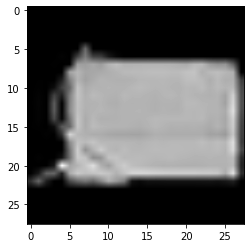

In [61]:
pre = X_test[18].reshape(1, -1)
y_pred_2 = vot_soft.predict(pre)

p = plt.subplot(1,1,1)
p.imshow(X_test[18], cmap=plt.cm.gray, interpolation='bilinear')

print("Predicted: ",y_pred_2)
print("Actual: ",y_test[18])

Predicted:  [7]
Actual:  7


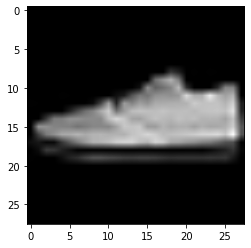

In [62]:
pre = X_test[60].reshape(1, -1)
y_pred_2 = model_stack.predict(pre)

p = plt.subplot(1,1,1)
p.imshow(X_test[60], cmap=plt.cm.gray, interpolation='bilinear')

print("Predicted: ",y_pred_2)
print("Actual: ",y_test[60])

Predicted:  [2]
Actual:  2


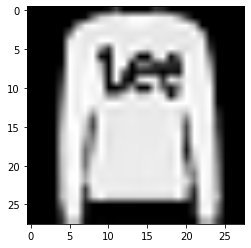

In [64]:
pre = X_test[1].reshape(1, -1)
y_pred_4 = rf.predict(pre)

p = plt.subplot(1,1,1)
p.imshow(X_test[1], cmap=plt.cm.gray, interpolation='bilinear')

print("Predicted: ",y_pred_4)
print("Actual: ",y_test[1])

Predicted:  [7]
Actual:  7


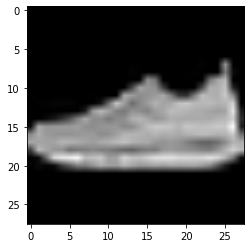

In [66]:
pre = X_test[61].reshape(1, -1)
y_pred_5 = ada.predict(pre)

p = plt.subplot(1,1,1)
p.imshow(X_test[61], cmap=plt.cm.gray, interpolation='bilinear')

print("Predicted: ",y_pred_5)
print("Actual: ",y_test[61])

In [67]:
import joblib

In [75]:
joblib.dump(rf,"/content/drive/MyDrive/Fashon_Classification/rf.pk")

['/content/drive/MyDrive/Fashon_Classification/rf.pk']

In [76]:
joblib.dump(dtc,"/content/drive/MyDrive/Fashon_Classification/dtc.pk")

['/content/drive/MyDrive/Fashon_Classification/dtc.pk']

In [77]:
joblib.dump(vot_soft,"/content/drive/MyDrive/Fashon_Classification/vot_soft.pk")

['/content/drive/MyDrive/Fashon_Classification/vot_soft.pk']